In [0]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

importing libraries and digits dataset already present in sklearn library module

Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

Classes

10

Samples per class

~180

Samples total

1797

Dimensionality

64

Features

integers 0-16

In [0]:
digit = load_digits()
digit

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [0]:
'''print(digit.head(10))
print(digit,tail())
print(digit.shape)'''
digit.data.shape

(1797, 64)

Independent features variables X and dependent target matrix y

In [0]:
X = digit.data[:,:-1]
y = digit.target
X

array([[ 0.,  0.,  5., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16., 10.,  0.],
       [ 0.,  0.,  0., ..., 11., 16.,  9.],
       ...,
       [ 0.,  0.,  1., ..., 13.,  6.,  0.],
       [ 0.,  0.,  2., ..., 16., 12.,  0.],
       [ 0.,  0., 10., ..., 14., 12.,  1.]])

Splitting dataset into training set and test set

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,
                                                random_state=10)

In [0]:
X_train.shape

(1437, 63)

Choosing new element from test set which is to be classified as which digit it is using KNN model

In [0]:
test = X_test[0]
test

array([ 0.,  0.,  8., 14., 16., 16.,  1.,  0.,  0.,  6., 16., 16.,  8.,
        3.,  0.,  0.,  0., 14., 14.,  1.,  0.,  0.,  0.,  0.,  0., 10.,
       15.,  4.,  0.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,
        0.,  0.,  0.,  1.,  8., 15.,  2.,  0.,  0.,  0.,  0.,  2., 13.,
       15.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,  0.,  0.])

Data visualising-- placing new data point in black color

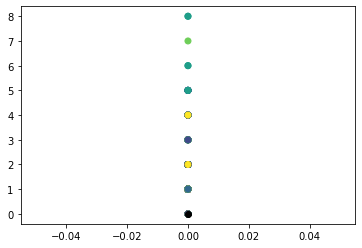

In [0]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.scatter(test[0],test[1],color='black')

Applying KNN classification model

In [0]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean') 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn.predict(test.reshape(1,-1))

array([5])

In [0]:
'''d,index=knn.kneighbors(test.reshape(1,-1),n_neighbors=3)--- another method of applying knn prediction model'''

'd,index=knn.kneighbors(test.reshape(1,-1),n_neighbors=3)--- another method of applying knn prediction model'

In [0]:
index

array([[1155,  257, 1035]])

In [0]:
for i in index[0]:
    print(y_train[i])

5
5
5


In [0]:
y_test[0]

5

In [0]:
pred = knn.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,pred)  #if we take k=5, accuracy=95% and if k=sqrt(datapoints), accuracy=84%

0.9888888888888889

In [0]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
mse

0.3194444444444444

In [0]:
import numpy as np

In [0]:
np.where(y_test!=pred)

(array([ 58, 129, 154, 249]),)

In [0]:
len(x_test)

360